<a href="https://colab.research.google.com/github/PocachipMind/Medical-Image-Processing-Model-Development/blob/main/1.2.%20Medical%20image%20acquisition/Practice/radiology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom
from pathlib import Path
import os
print(os.getcwd())

/content


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kmader/siim-medical-images")

print("Path to dataset files:", path)

100%|██████████| 250M/250M [00:04<00:00, 59.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kmader/siim-medical-images/versions/6


In [4]:
IMG_PATH= Path("/root/.cache/kagglehub/datasets/kmader/siim-medical-images/versions/6")
print(IMG_PATH)

/root/.cache/kagglehub/datasets/kmader/siim-medical-images/versions/6


In [5]:
data_df = pd.read_csv(IMG_PATH/"overview.csv")
data_df.head()

Unnamed: 0  Age  Contrast ContrastTag  \
0           0   60      True        NONE   
1           1   69      True        NONE   
2           2   74      True     APPLIED   
3           3   75      True        NONE   
4           4   56      True        NONE   

                                      raw_input_path  id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm   0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm   1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm   2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm   3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm   4   

                            tiff_name                          dicom_name  
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm  
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm  
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_0074_CONTRAST_1_CT.dcm  
3  ID_0003_AGE_0075_CONTRAST_1_CT.tif  ID_0003_AGE_0075_CONTRAST_1_CT.dcm  
4  ID_0004_AGE_0056_CONTRAST_1_CT.tif  ID_0004_AGE_0056_CONTRAST_1_CT.dcm

In [6]:
data_df.keys()

Index(['Unnamed: 0', 'Age', 'Contrast', 'ContrastTag', 'raw_input_path', 'id',
       'tiff_name', 'dicom_name'],
      dtype='object')

In [7]:
def process_data(path):
    dicom_path = IMG_PATH/path
    data = pd.DataFrame([{'path': filepath} for filepath in dicom_path.glob('*.dcm')])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [8]:
print("Number of DICOM:", len(str(IMG_PATH/"dicom_dir")))
dicom_data = process_data('dicom_dir')
dicom_data.head()

Number of DICOM: 79


path  \
0  /root/.cache/kagglehub/datasets/kmader/siim-me...   
1  /root/.cache/kagglehub/datasets/kmader/siim-me...   
2  /root/.cache/kagglehub/datasets/kmader/siim-me...   
3  /root/.cache/kagglehub/datasets/kmader/siim-me...   
4  /root/.cache/kagglehub/datasets/kmader/siim-me...   

                                 file    ID  Age  Contrast Modality  
0  ID_0074_AGE_0074_CONTRAST_0_CT.dcm  0074   74     False       CT  
1  ID_0010_AGE_0060_CONTRAST_1_CT.dcm  0010   60      True       CT  
2  ID_0087_AGE_0044_CONTRAST_0_CT.dcm  0087   44     False       CT  
3  ID_0029_AGE_0078_CONTRAST_1_CT.dcm  0029   78      True       CT  
4  ID_0058_AGE_0082_CONTRAST_0_CT.dcm  0058   82     False       CT

In [9]:
dicom_data.keys()

Index(['path', 'file', 'ID', 'Age', 'Contrast', 'Modality'], dtype='object')

In [10]:
def show_images(data, dim=16, imtype='dicom'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        # data_row_img = dicom.read_file(data_row['path']) # pydicom 3.0 이하 버전 함수. 3.0 버전 이후부터는 dcmread로 바뀌었다.
        data_row_img = dicom.dcmread(data_row['path'])
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()


이미지에 대한 슬라이스들 마다 퀄리티가 다르고 밝기가 다름.

다이콤 내부의 window width나 window center를 사용해서 이미지를 전처리할 필요가 있음.
그리고 이 이미지들의 사이즈가 동일하지만, 픽셀과 픽셀사이 ㄱ이미지에 대한 슬라이스들 마다 퀄리티가 다르고 밝기가 다름.

다이콤 내부의 window width나 window center를 사용해서 이미지를 전처리할 필요가 있음.
그리고 이 이미지들의 사이즈가 동일하지만, 픽셀과 픽셀사이 distance가 다르기 때문에 물리적으로 보는 영상은 다르게 됨.

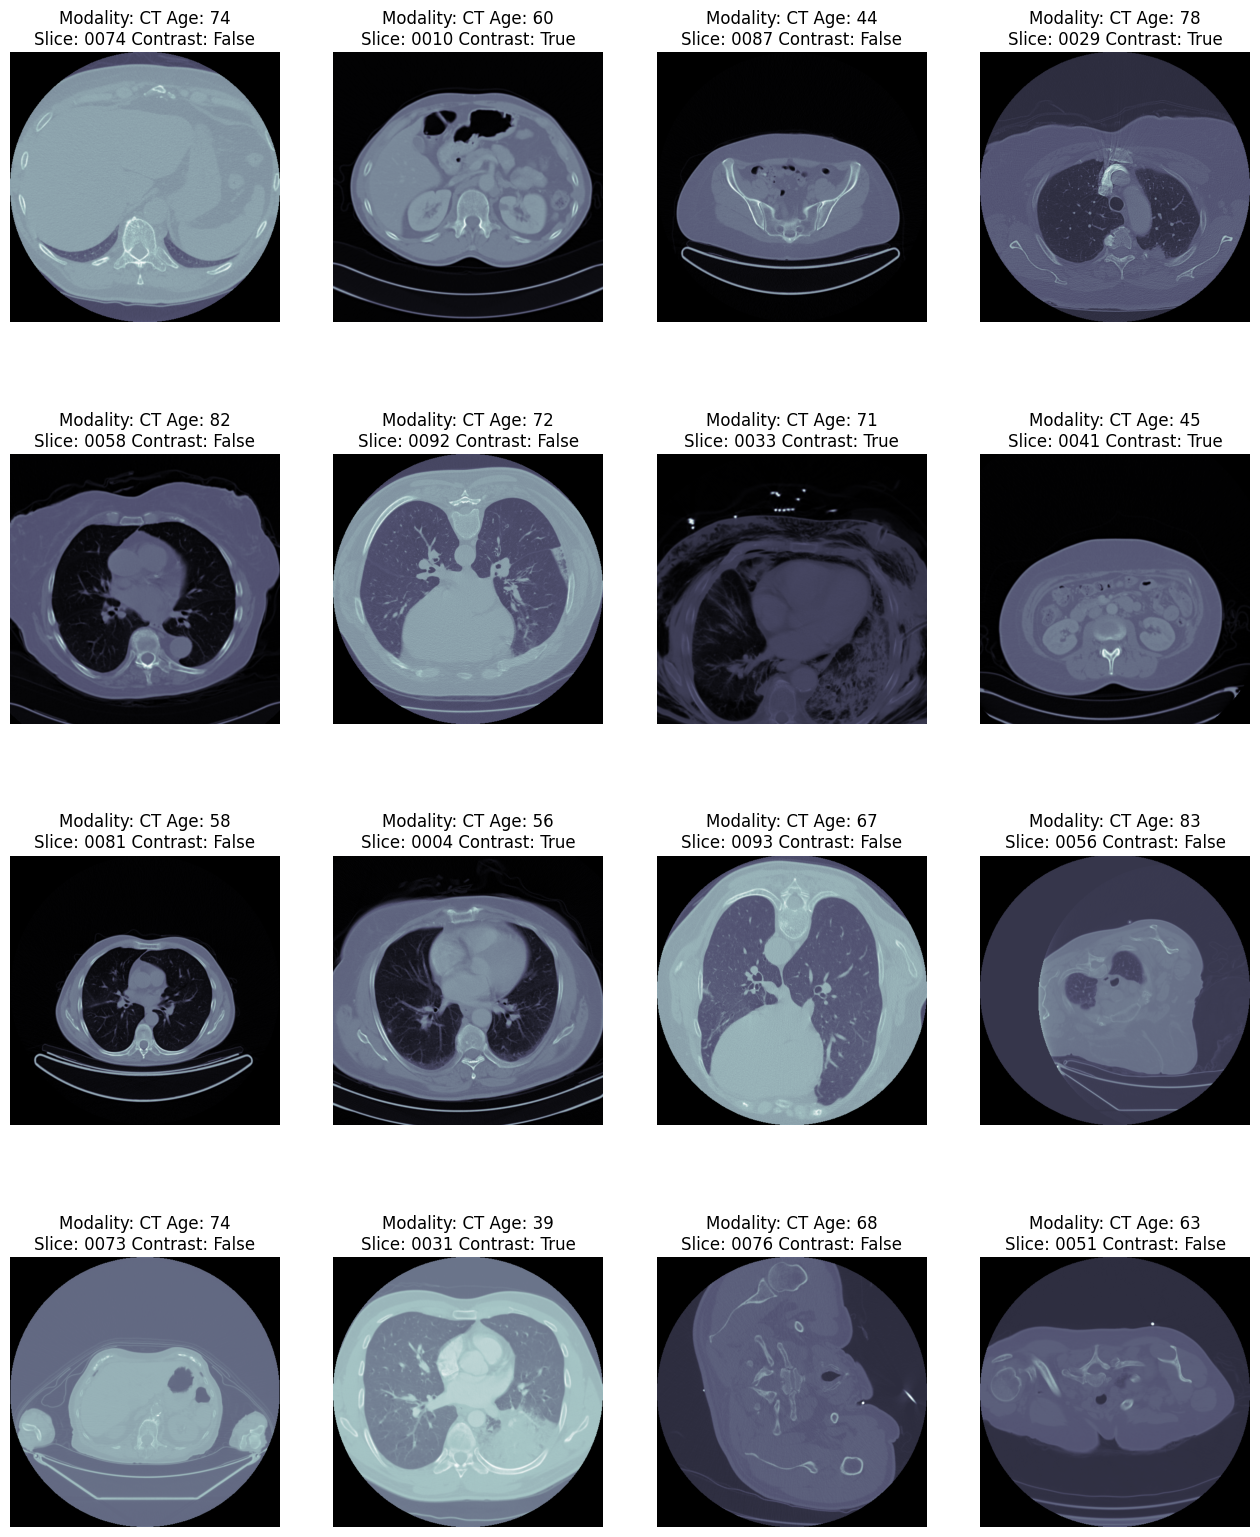

In [11]:
show_images(dicom_data,16,'DICOM')

In [12]:
## preprocessing
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[0])
dicom_dataset

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6450.9002.114842089820044488837436055958
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0012) Instance Creation Date              DA: '20030116'
(0008,0013) Instance Creation Time              TM: '083634'
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID      

Rows, Columns, Pixel Spacing

Window Center, Window Width > 하우스필드 유닛

그레이스케일을 어떤 슬롭 쓸지 Rescale Slope

In [13]:
len(dicom_data)

100

# get_pixels_hu(slices)
- DICOM 이미지를 **Hounsfield Unit (HU, 헨스필드 단위)**로 변환하는 함수



## HU란?

CT 스캔에서는 픽셀 값이 밀도를 나타내며, 이를 HU로 변환하면 조직별로 의미 있는 값을 가질 수 있음

- 공기: 약 -1000 HU

- 물: 0 HU

- 뼈: +1000 HU 이상

- 연조직(Soft Tissue): 0 ~ 100 HU

CT 장치는 원본 픽셀 값을 저장할 때 특정 보정 값(RescaleIntercept, RescaleSlope)을 사용하므로, 원래의 HU 값을 얻으려면 변환이 필요합니다.

## 구현 과정

- slices(DICOM 파일 리스트)에서 픽셀 데이터를 numpy 배열로 변환

- 데이터 타입을 int16으로 변환 (CT 스캔의 픽셀 값은 보통 16비트)

- 스캔 바깥 영역의 픽셀 값이 -2000이면 0으로 변경

- HU 변환 공식 적용

  - DICOM 파일에서 RescaleIntercept(기본값: -1024)과 RescaleSlope를 가져와 변환

  - Slope != 1이면 픽셀 값을 Slope만큼 곱해서 변환

## 결과

HU 단위로 변환된 3D 이미지 배열 반환 (np.int16 타입)

In [14]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    """slices는 여러 장의 CT 스캔 슬라이스(각각 pydicom.dataset.FileDataset 객체) 리스트
s.pixel_array는 DICOM 이미지 데이터를 numpy 배열로 변환한 값
np.stack()을 사용하여 여러 슬라이스를 하나의 3D 배열로 만듦"""

    # Convert to int16 (from sometimes int16),
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)


    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    # CT 스캔 바깥 영역(배경)은 -2000으로 저장될 수 있음 → 이를 0으로 설정


    # Convert to Hounsfield units (HU)
    # HU변환 공식 : HU = pixel value × RescaleSlope + RescaleIntercept
    for slice_number in range(len(slices)):

        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope

        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)

        image[slice_number] += np.int16(intercept)

    return np.array(image, dtype=np.int16)

# load_scan(path)
DICOM 파일을 읽고, CT 슬라이스를 정리하는 함수

## 구현 과정

- dicom.dcmread()를 사용해 path 내의 DICOM 파일을 읽어 slices 리스트에 저장

- 슬라이스 두께(SliceThickness) 계산

  - ImagePositionPatient[2] 속성을 이용해 두 개의 인접한 슬라이스 간의 거리 계산

  - ImagePositionPatient가 없을 경우, SliceLocation 값을 이용해 대체

- 각 슬라이스(s.SliceThickness)에 동일한 두께 값 저장

## 결과

슬라이스 정렬 및 두께 정보가 추가된 DICOM 객체 리스트 반환

In [15]:
def load_scan(path):
    slices = [dicom.dcmread(s) for s in path]
    """path는 DICOM 파일 경로 리스트

dicom.dcmread(s)를 사용하여 각 파일을 pydicom.dataset.FileDataset 객체로 변환"""

#     slices.sort(key = lambda x: float(x.ImagePositionPatient[2])) # 3차원 이미지가 아님
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2]) # Image Position 속성에 해당되는 값임
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)

    """
    CT 슬라이스 간의 두께(SliceThickness)는 연속된 슬라이스의 Z축 좌표 차이로 계산

ImagePositionPatient[2]는 Z축 위치를 나타내므로, 이를 이용해 슬라이스 두께를 구함

만약 ImagePositionPatient가 없으면 SliceLocation을 이용하여 대체

np.abs()를 사용해 절댓값으로 변환하여 음수 값 방지"""



    for s in slices:
        s.SliceThickness = slice_thickness

    return slices
    # CT 스캔 데이터를 포함하는 pydicom.dataset.FileDataset 리스트 반환

 # resample(image, scan, new_spacing=[1,1,1])
CT 스캔 데이터를 1x1x1 mm의 균일한 스페이싱으로 리샘플링

## 구현 과정

- 기존 **픽셀 스페이싱 값(PixelSpacing)**을 가져옴

- 현재 스페이싱과 new_spacing을 비교하여 리사이징 비율(resize_factor) 계산

- scipy.ndimage.interpolation.zoom()을 이용해 이미지 리샘플링 수행

## 결과

- image: 리샘플링된 3D CT 데이터

- new_spacing: 새로운 픽셀 스페이싱 값

In [27]:
# import scipy
from scipy.ndimage import zoom

def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    c_float = lambda x : [float(i) for i in x]

    # 해당 z 축 고려안하므로 float(1) 로 설정
    spacing = np.array([float(1)] + c_float(scan.PixelSpacing), dtype=np.float32)
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor

    # image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest') # 버전 업그레이드
    image = zoom(image, real_resize_factor, mode='nearest')

    return image, new_spacing

- get_pixels_hu() → DICOM 데이터를 HU 단위로 변환

- load_scan() → DICOM 파일을 읽고 슬라이스 정리

- resample() → 3D CT 이미지를 균일한 해상도로 변환

CT 데이터를 딥러닝 모델 입력으로 사용하려면 HU 변환 + 정규화 + 리샘플링

In [28]:
scan_dataset = load_scan(dicom_data['path'].to_list())
hu_value = get_pixels_hu(scan_dataset)

In [29]:
len(scan_dataset)

100

In [30]:
hu_value.shape

(100, 512, 512)

In [31]:
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[0])
print(dicom_dataset[('0028', '0030')].value)

[0.605469, 0.605469]


In [32]:
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[2])
print(dicom_dataset[('0028', '0030')].value)

[0.9765625, 0.9765625]


이처럼 픽셀 스페이싱이 다름 통일화 필요

In [33]:
slice_n = 80
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[slice_n])
dicom_dataset[('0028', '0030')].value

[0.703125, 0.703125]

In [34]:
pix_resampled, spacing = resample(hu_value[[slice_n]], scan_dataset[slice_n], [1,1,1])
print("Shape before resampling\t", hu_value[[slice_n]].shape)
print("Shape after resampling\t", pix_resampled.shape)

Shape before resampling	 (1, 512, 512)
Shape after resampling	 (1, 360, 360)


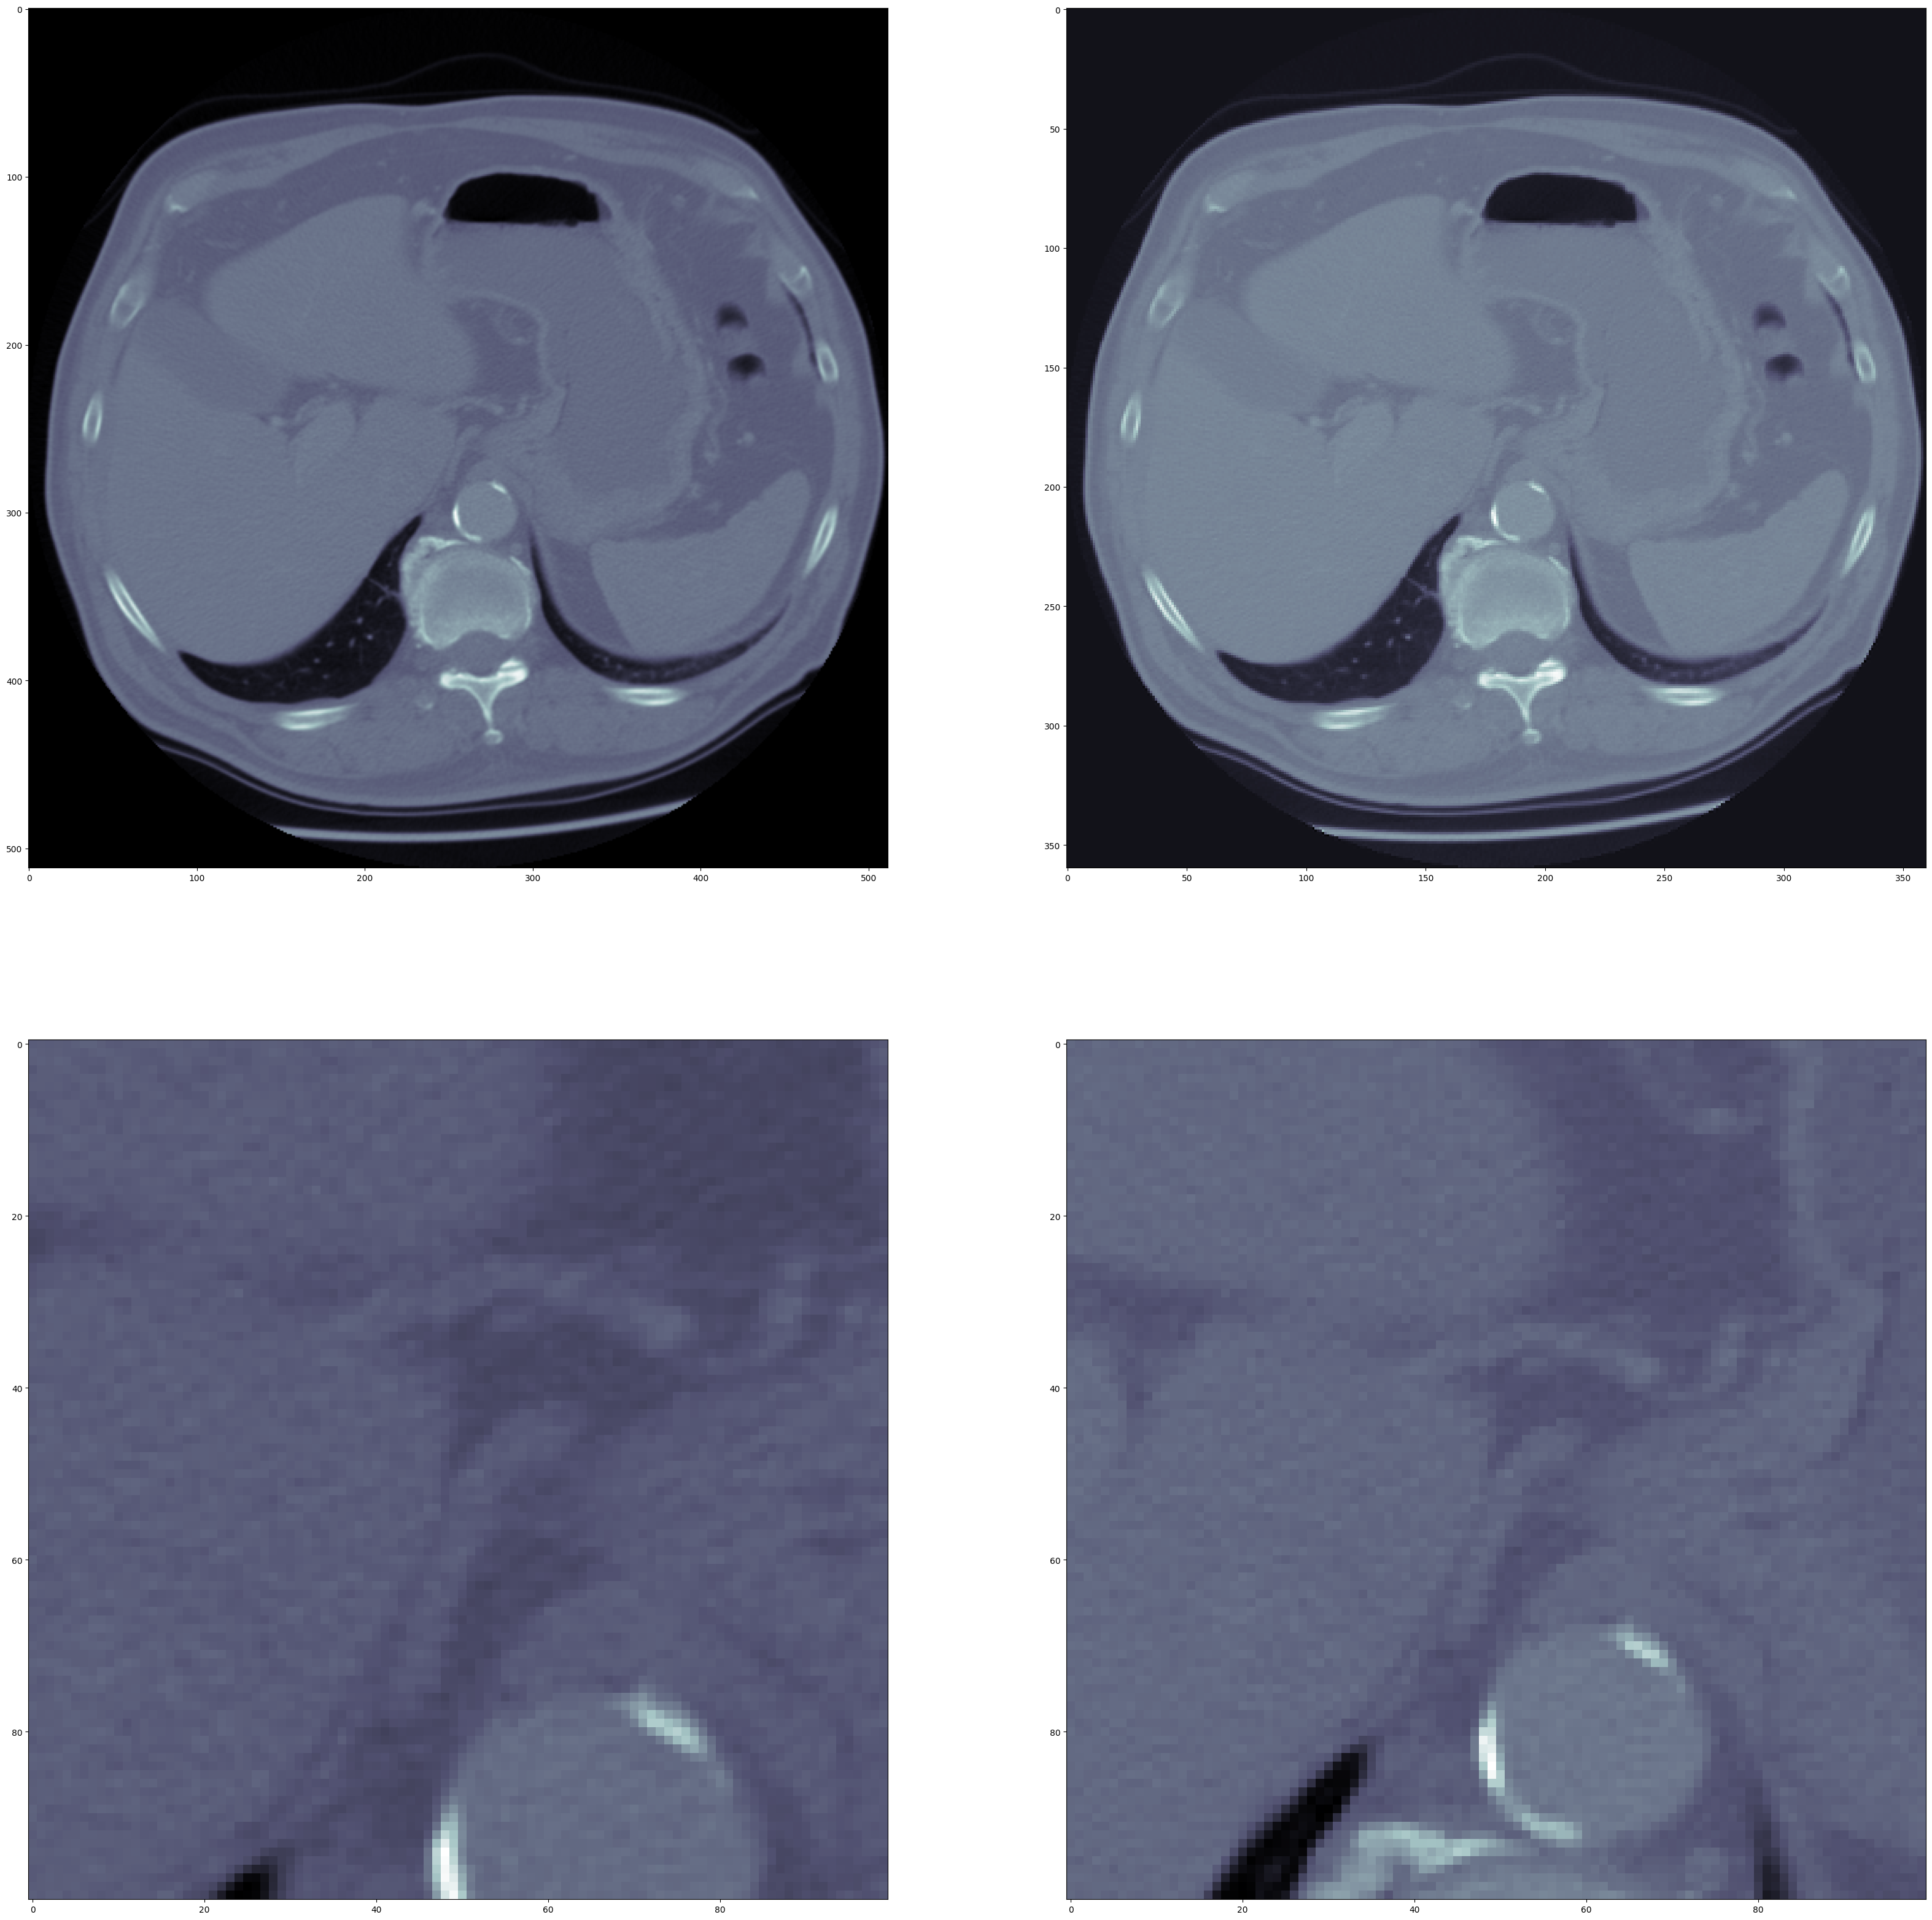

In [35]:
#print(data)
fig,axs = plt.subplots(2,2,figsize=(40,40))

axs[0,0].imshow(hu_value[slice_n], cmap=plt.cm.bone)
axs[0,0].grid(False)

axs[0,1].imshow(pix_resampled[0], cmap=plt.cm.bone)
axs[0,1].grid(False)

w,h = hu_value[slice_n].shape
w/=2
h/=2
w,h = int(w),int(h)
axs[1,0].imshow(hu_value[slice_n][h-50:h+50,w-50:w+50], cmap=plt.cm.bone)
axs[1,0].grid(False)

w,h = pix_resampled[0].shape
w/=2
h/=2
w,h = int(w),int(h)
axs[1,1].imshow(pix_resampled[0,h-50:h+50,w-50:w+50], cmap=plt.cm.bone)
axs[1,1].grid(False)




픽셀 스페이싱 외에도 필수적인 전처리

HU값

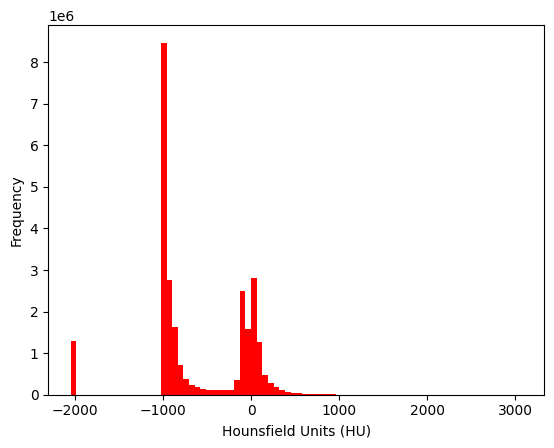

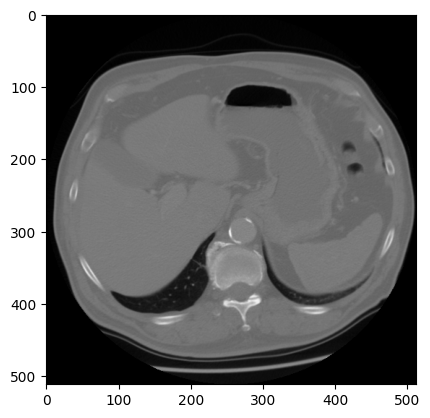

In [36]:
# 예시 이미지 히스토그램

plt.hist(hu_value.flatten(), bins=80, color='r')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

plt.imshow(hu_value[80], cmap=plt.cm.gray)
plt.show()
# # Show some slice in the middle
# plt.imshow(first_patient_pixels[80], cmap=plt.cm.gray)
# plt.show()

In [46]:
"""
-DICOM 이미지의 픽셀 값을 윈도잉 변환-

img * slope + intercept 연산을 통해 DICOM 픽셀 값을 실제 HU 값으로 변환.

window_center와 window_width를 사용하여 원하는 범위로 제한.

지정된 윈도잉 범위보다 작은 값은 최소값으로, 큰 값은 최대값으로 조정.
"""
def window_image(img, window_center,window_width, intercept, slope):

    img = (img*slope +intercept) # uint16 값 넘어가며 OverflowError
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img

def window_image(img, window_center, window_width, intercept, slope):
    img = img.astype(np.float32)  # 오버플로우 방지
    img = img * slope + intercept  # 변환 연산

    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2

    img = np.clip(img, img_min, img_max)  # 값 제한

    return img

"""
- DICOM 데이터에서 특정 필드 값을 int 타입으로 변환 -

DICOM 필드 값이 MultiValue(리스트 같은 객체)라면 첫 번째 값만 가져와 int로 변환.

단일 값이면 바로 int로 변환.
"""
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == dicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

"""
-DICOM 파일에서 윈도우 센터, 윈도우 폭, 인터셉트, 슬로프 값을 가져와 변환-

DICOM 메타데이터에서 윈도잉 관련 정보를 가져와 정수 값으로 변환.

get_first_of_dicom_field_as_int()를 사용하여 각 필드를 변환.
"""

def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [47]:
get_windowing(dicom_dataset) # 40 기준 +- 400

[40, 400, -1024, 1]

In [48]:
w_center, w_width, intercept, slope = get_windowing(dicom_dataset)

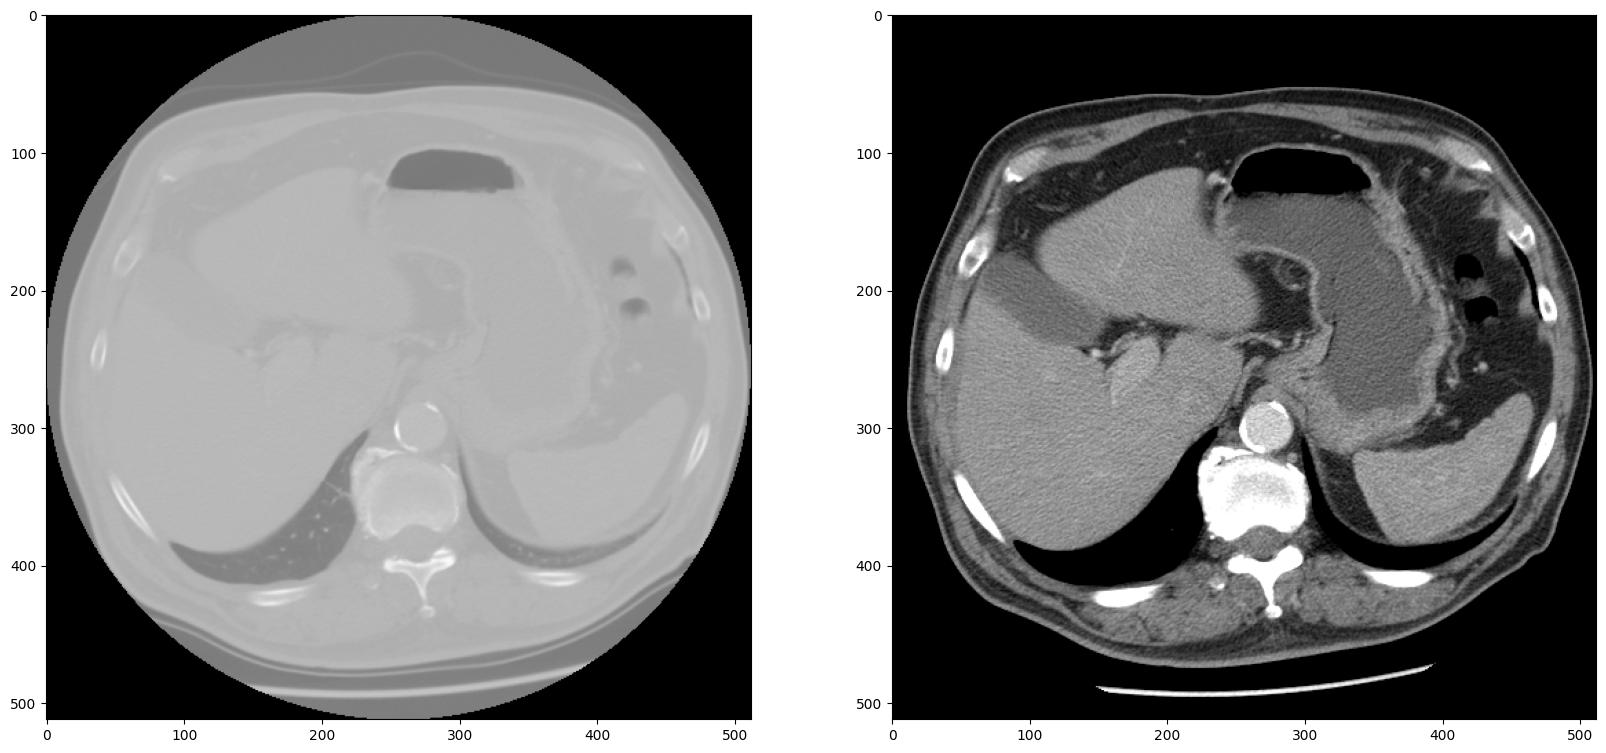

In [49]:
import pydicom
import matplotlib.pyplot as plt
dicom_dataset = scan_dataset[80]
#print(data)
fig,axs = plt.subplots(1,2,figsize=(20,40))
window_center , window_width, intercept, slope = get_windowing(dicom_dataset)

#displaying the image
img = dicom_dataset.pixel_array
axs[0].imshow(img, cmap='gray')
axs[0].grid(False)
img = window_image(img, window_center, window_width, intercept, slope)
axs[1].imshow(img, cmap='gray')
axs[1].grid(False)

In [50]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        data_row_img = dicom.dcmread(data_row['path'])
        window_center , window_width, intercept, slope = get_windowing(data_row_img)
        img = data_row_img.pixel_array
        img = window_image(img, window_center, window_width, intercept, slope)

        ax[i//4, i%4].imshow(img, cmap=plt.cm.bone)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()


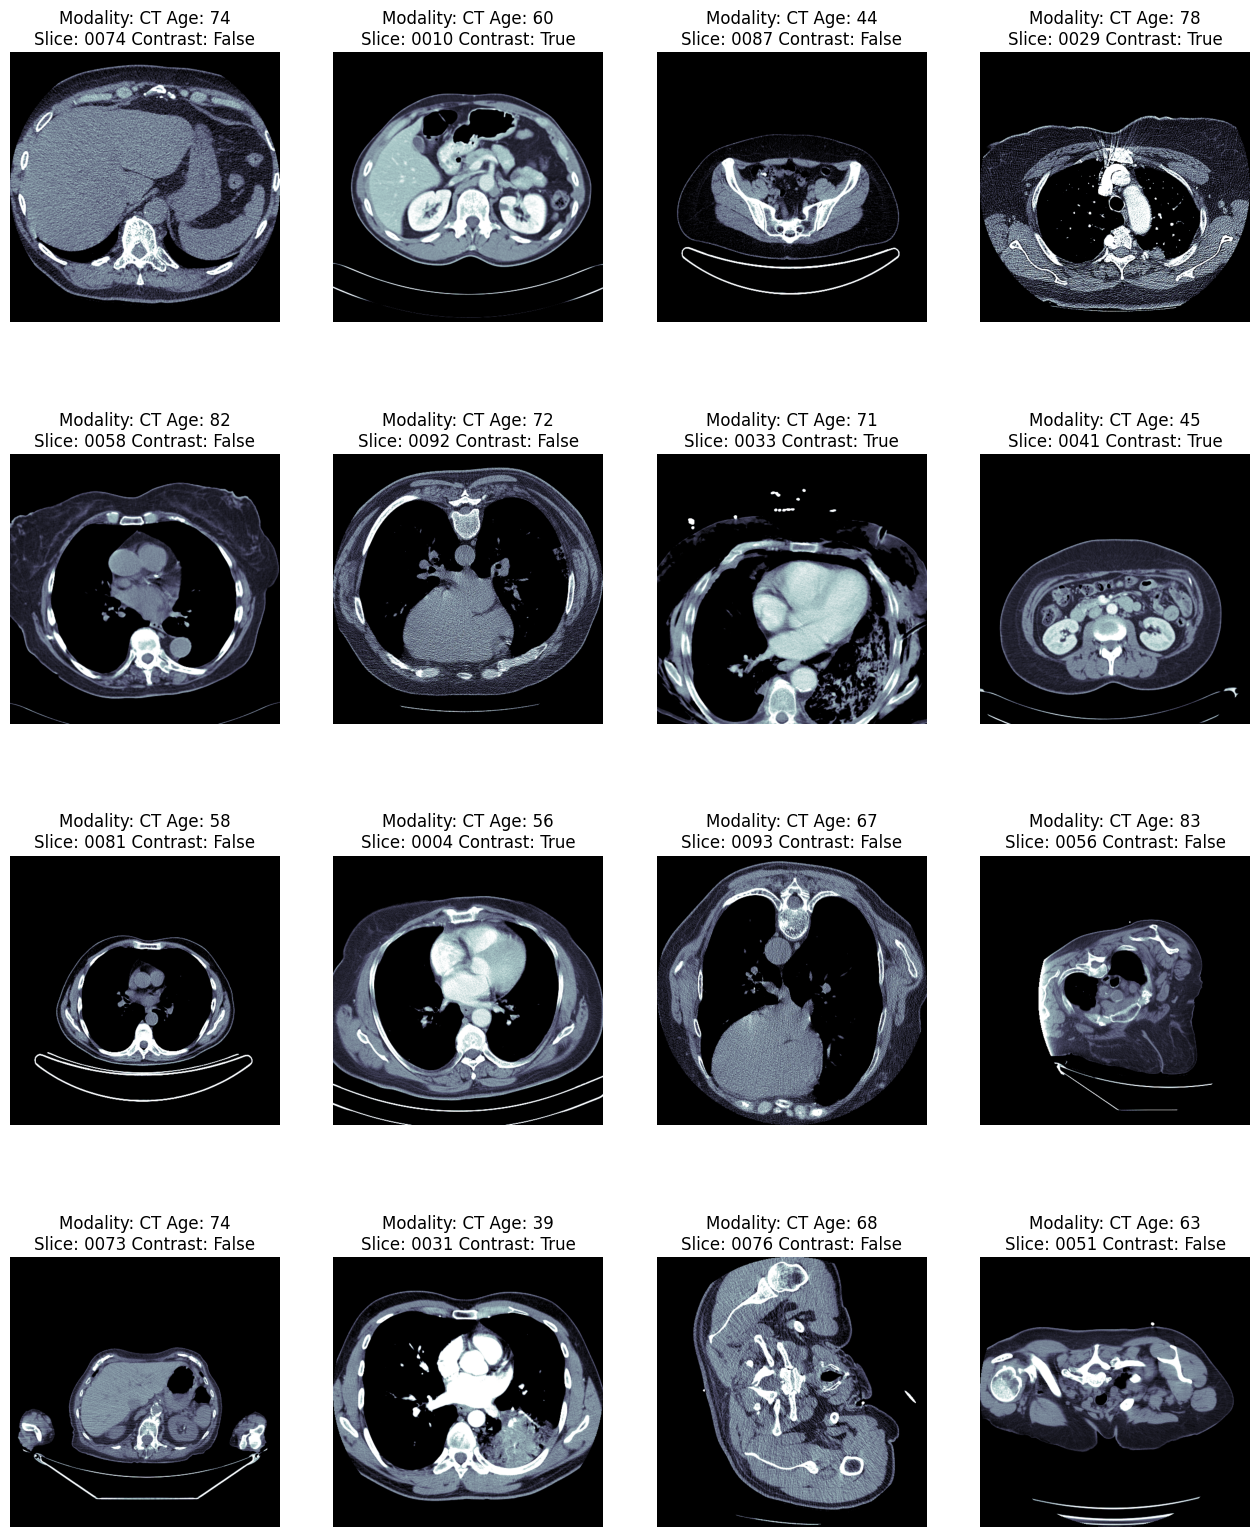

In [51]:
show_images(dicom_data,16,'DICOM')

In [52]:
window_center , window_width, intercept, slope

(40, 400, -1024, 1)

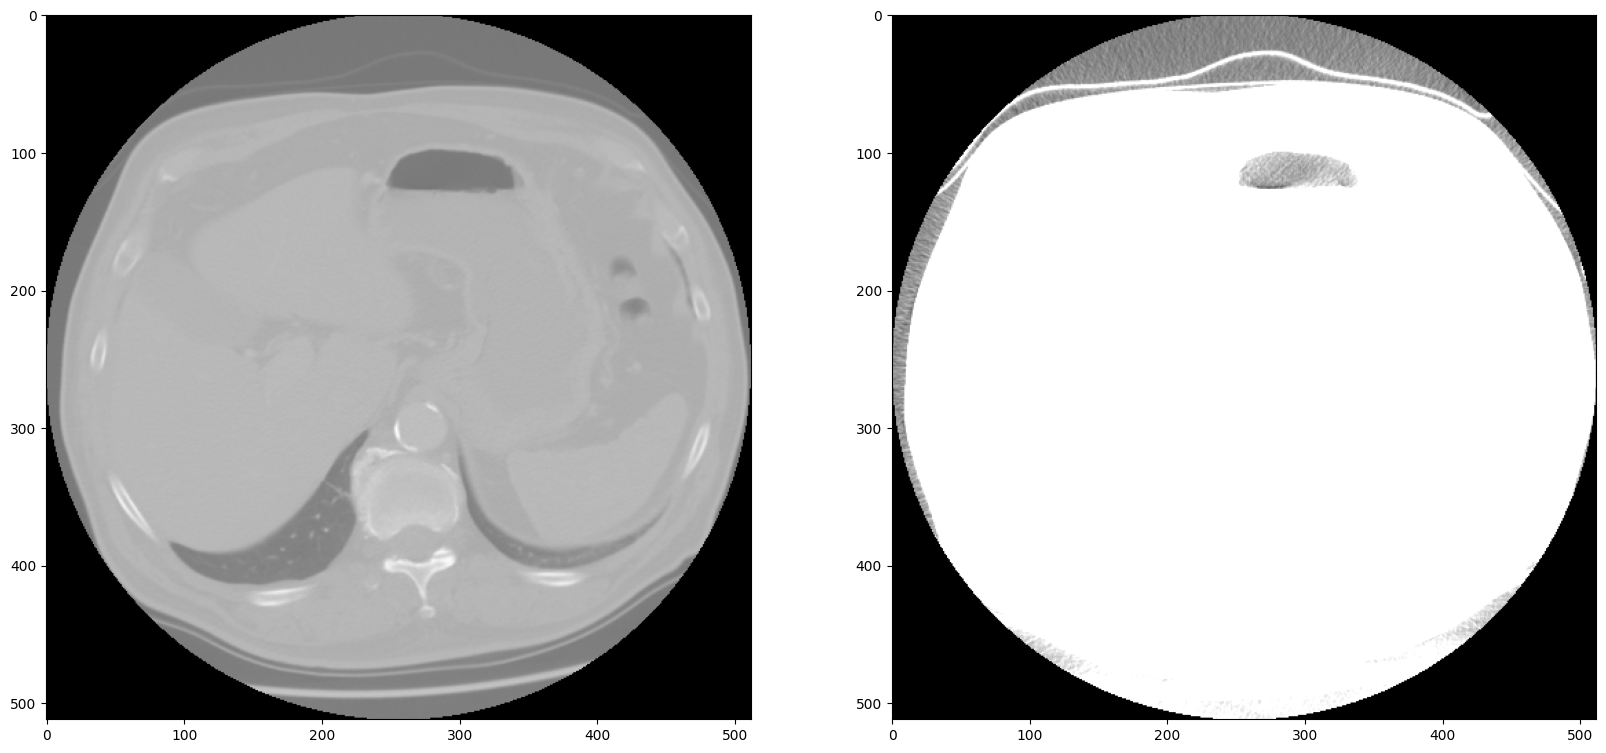

In [53]:
# 맘대로 지정해보기!

import pydicom
import matplotlib.pyplot as plt
dicom_dataset = scan_dataset[80]
#print(data)
fig,axs = plt.subplots(1,2,figsize=(20,40))
# window_center , window_width, intercept, slope = get_windowing(dicom_dataset)
window_center , window_width, intercept, slope = -1000 , 200, -1024, 1

#displaying the image
img = dicom_dataset.pixel_array
axs[0].imshow(img, cmap='gray')
axs[0].grid(False)
img = window_image(img, window_center, window_width, intercept, slope)
axs[1].imshow(img, cmap='gray')
axs[1].grid(False)